In [2]:
import geopandas as gpd
import folium
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#bringing in necessary libraries to start EDA
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score
from sklearn.multiclass import BaseEstimator
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
path="../../Data/"
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
df = pd.read_csv('../../Data/training_set_values.csv',dtype={"permit":"string","public_meeting":"string"})
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,<NA>,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
target_df=pd.read_csv(path+'training_set_labels.csv')
target_df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [5]:
geopandasj=df.merge(target_df, on="id",how="inner")
geopandasj

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,<NA>,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [6]:
cords_df=geopandasj.loc[:,["latitude","longitude","status_group"]]
cords_df

,latitude,longitude,status_group
0,-9.856322,34.938093,functional
1,-2.147466,34.698766,functional
2,-3.821329,37.460664,functional
3,-11.155298,38.486161,non functional
4,-1.825359,31.130847,functional
...,...,...,...
59395,-3.253847,37.169807,functional
59396,-9.070629,35.249991,functional
59397,-8.750434,34.017087,functional
59398,-6.378573,35.861315,functional


In [7]:
gdf = gpd.GeoDataFrame(
    cords_df, geometry=gpd.points_from_xy(cords_df.longitude, cords_df.latitude))

In [16]:
gdf
out = gdf[gdf['longitude'] != 0.0]
out.status_group.value_counts()

functional                 31389
non functional             22268
functional needs repair     3931
Name: status_group, dtype: int64

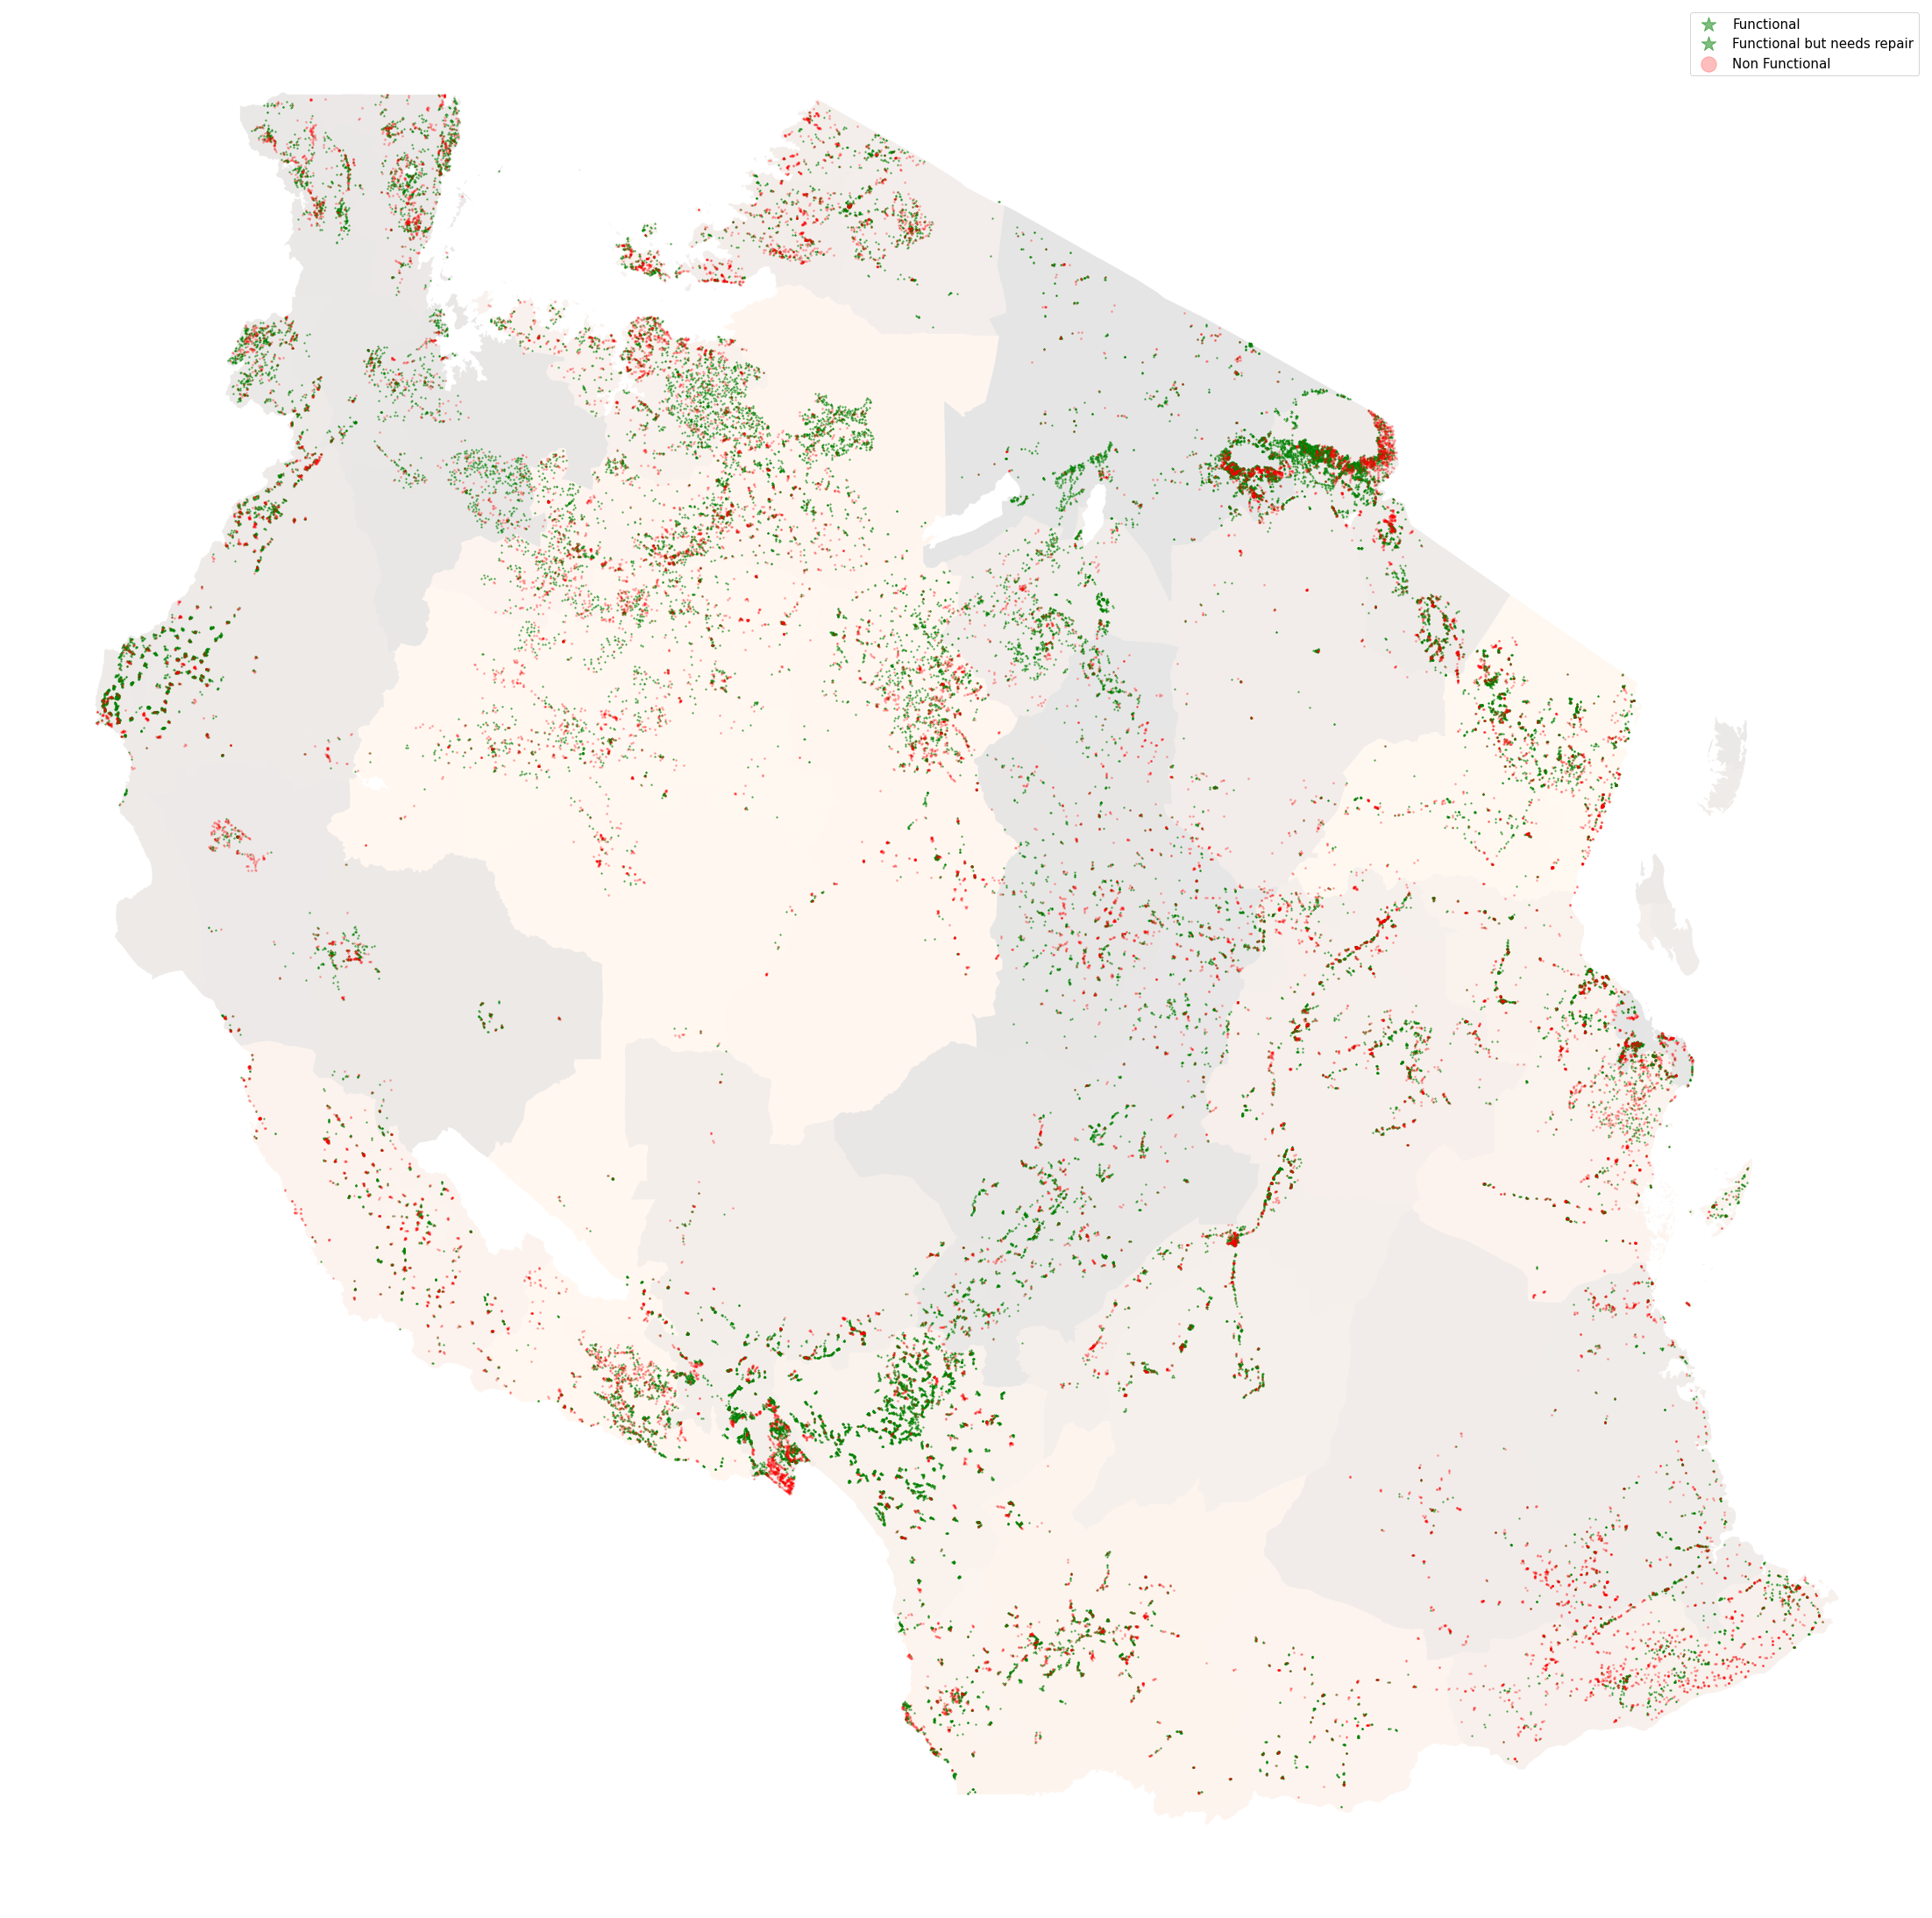

In [15]:
fig,ax = plt.subplots(figsize=(40,40))
tan.plot(ax=ax, alpha = .10, cmap = 'copper')
out[out['status_group']== 'functional'].plot(ax = ax, markersize = 3, alpha=.5,
                                                  color='green', marker = '*',label = 'Functional');
out[out['status_group']== 'functional needs repair'].plot(ax=ax,markersize=3,alpha=.5,
                                                                color='green', marker = '*',label = 'Functional but needs repair')
out[out['status_group']== 'non functional'].plot(ax=ax,markersize=3,alpha=.25,
                                                      color='red',marker='o',label = 'Non Functional')
ax.axis('off')
plt.legend(loc='upper right', fontsize='15',markerscale=10);
plt.savefig('Wells&Tanzania2.png', transparent=True,dpi=300, bbox_inches = "tight")


,ADM0_EN,ADM0_SW,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,geometry
0,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Arusha,TZ02,Arusha,TZ0206,"MULTIPOLYGON (((36.82231 -3.44251, 36.82211 -3..."
1,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Arusha,TZ02,Arusha Urban,TZ0203,"POLYGON ((36.63247 -3.36366, 36.63215 -3.36382..."
2,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Arusha,TZ02,Karatu,TZ0204,"POLYGON ((35.89154 -3.25459, 35.88634 -3.26033..."
3,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Arusha,TZ02,Longido,TZ0207,"MULTIPOLYGON (((36.35742 -3.05734, 36.35728 -3..."
4,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Arusha,TZ02,Meru,TZ0202,"POLYGON ((36.89951 -3.05109, 36.90068 -3.05144..."
...,...,...,...,...,...,...,...,...
165,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Tanga,TZ04,Lushoto,TZ0401,"POLYGON ((38.40366 -4.10869, 38.40923 -4.11184..."
166,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Tanga,TZ04,Mkinga,TZ0408,"POLYGON ((39.19192 -4.65801, 39.19538 -4.66106..."
167,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Tanga,TZ04,Muheza,TZ0403,"POLYGON ((38.67176 -4.93219, 38.67882 -4.93282..."
168,United Republic of Tanzania,Jamhuri ya Muungano wa Tanzania,TZ,Tanga,TZ04,Pangani,TZ0405,"POLYGON ((38.87129 -5.26710, 38.87237 -5.26745..."


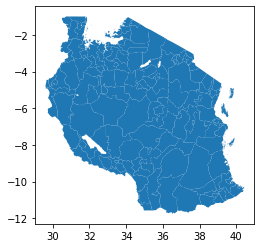

In [10]:
tan=gpd.read_file("../..//Data/tza_admbnda_adm2_20181019/tza_admbnda_adm2_20181019.shp")
tan.plot()
tan

In [ ]:
gdf = gpd.GeoDataFrame(tan4, geometry='geometry')
gdf

In [ ]:
# We restrict to South America.
ax = tan4.plot(
    color='white', edgecolor='black')
ax. t.plot(
    color='white', edgecolor='black')
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
# # geometry = [Point(xy) for xy in zip(functional_needs_repair_cords['longitude'],functional_needs_repair_cords['latitude'])]
# crs = {'init': 'epsg:4326'} 
# geometry = [(xy) for xy in zip(funcitonal_cords['longitude'],funcitonal_cords['latitude'])]

# geo_df = gpd.GeoDataFrame(gdf,
#                           crs = crs,
#        geometry=geometry)

In [ ]:
geo_df

In [ ]:
fig,ax = plt.subplots(figsize=(20,15))
TZ.plot(ax=ax, alpha = .25, cmap = 'Purples')
bok_df[bok_df['status_group']== 'functional'].plot(ax = ax, markersize = 3, alpha=.5,
                                                  color='blue', marker = 'o',label = 'Functional');
bok_df[bok_df['status_group']== 'functional needs repair'].plot(ax=ax,markersize=3,alpha=.5,
                                                                color='red', marker = 'o',label = 'Repair Needed')
bok_df[bok_df['status_group']== 'non functional'].plot(ax=ax,markersize=3,alpha=.25,
                                                      color='grey',marker='o',label = 'Non Functional')
ax.axis('off')
plt.legend(loc='upper right', fontsize='18',markerscale=10);

In [ ]:
#import shape file into geopandas
TZ = gpd.read_file('../data/GIS_Maps/Regions.shp')
#TZ.to_csv('Tanzania_shapes.csv')
5:07
#add coordinate geometry to dataframe and save as csv
crs = {'init': 'epsg:4326'} #coordinate system based on lat/long
geometry = [(xy) for xy in zip(data['longitude'],data['latitude'])]
geo_df = gpd.GeoDataFrame(data,
                          crs = crs,
                          geometry=geometry)
geo_df.head()
#geo_df.to_csv('geo_data.csv')
5:07
#function to define X,y coordinates from points
def getPointCoords(row, geom, coord_type):
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y
5:07
# Calculate x coordinates
geo_df['x'] = geo_df.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
# Calculate y coordinates
geo_df['y'] = geo_df.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)
# Let's see what we have now
geo_df.head()

#drop row with 0.0 as X coord
out = geo_df['x'] != 0.0
bok_df = geo_df[out]
bok_df.to_csv('geodata_clean.csv') #save file for later use
bok_df.head()


#plot by status_group (not using bokeh, yet!)
fig,ax = plt.subplots(figsize=(20,15))
TZ.plot(ax=ax, alpha = .25, cmap = 'Purples')
bok_df[bok_df['status_group']== 'functional'].plot(ax = ax, markersize = 3, alpha=.5,
                                                  color='blue', marker = 'o',label = 'Functional');
bok_df[bok_df['status_group']== 'functional needs repair'].plot(ax=ax,markersize=3,alpha=.5,
                                                                color='red', marker = 'o',label = 'Repair Needed')
bok_df[bok_df['status_group']== 'non functional'].plot(ax=ax,markersize=3,alpha=.25,
                                                      color='grey',marker='o',label = 'Non Functional')
ax.axis('off')
plt.legend(loc='upper right', fontsize='18',markerscale=10);